In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

df = pd.read_excel("textfiles\ANZ synthesised transaction dataset.xlsx")
df

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit


In [2]:
data = df[['age','amount','balance']]
data.head()

,age,amount,balance
0,26,16.25,35.39
1,26,14.19,21.20
2,38,6.42,5.71
3,40,40.90,2117.22
4,26,3.25,17.95


Text(0.5, 1.0, 'Scatter plot for age and balance')

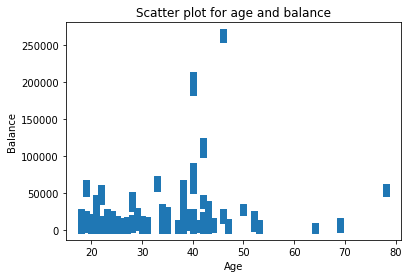

In [3]:
plt.scatter(data.age,data.balance, marker = 's')
plt.xlabel("Age")
plt.ylabel("Balance")
plt.title("Scatter plot for age and balance")

Text(0.5, 1.0, 'Scatter plot for age and Amount')

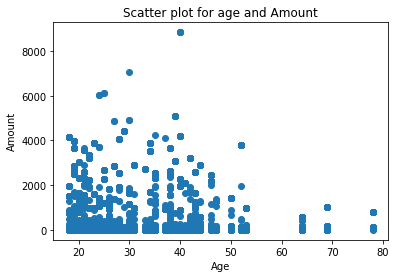

In [4]:
plt.scatter(data.age,data.amount)
plt.xlabel("Age")
plt.ylabel("Amount")
plt.title("Scatter plot for age and Amount")

In [5]:
df_salaries = df[df["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean()
df_salaries.head()

,card_present_flag,merchant_code,balance,age,amount
customer_id,,,,,
CUS-1005756958,NaN,0.0,4718.665385,53,970.47
CUS-1117979751,NaN,0.0,11957.202857,21,3578.65
CUS-1140341822,NaN,0.0,5841.720000,28,1916.51
CUS-1147642491,NaN,0.0,8813.467692,34,1711.39
CUS-1196156254,NaN,0.0,23845.717143,34,3903.73


In [6]:
salaries = []

for customer_id in df["customer_id"]:
    salaries.append(int(df_salaries.loc[customer_id]["amount"]))
    
df["annual_salary"] = salaries

In [8]:
df_customer = df.groupby("customer_id").mean()
df_customer.head()

,card_present_flag,merchant_code,balance,age,amount,annual_salary
customer_id,,,,,,
CUS-1005756958,0.812500,0.0,2275.852055,53,222.862603,970
CUS-1117979751,0.826923,0.0,9829.929000,21,339.843700,3578
CUS-1140341822,0.815385,0.0,5699.212250,28,212.632500,1916
CUS-1147642491,0.750000,0.0,9032.841186,34,245.600169,1711
CUS-1196156254,0.785276,0.0,22272.433755,34,147.145796,3903


## Linear Regression
### Model preparation

In [16]:
indep = df_customer.iloc[:,:-1].values
dep = df_customer['annual_salary'].values

X_train,X_test,y_train,y_test = train_test_split(indep, dep ,test_size=0.25,random_state=0)


#### model fitting and finding accuracy rate

In [17]:
r = LinearRegression()
r.fit(X_train, y_train)
r.score(X_train, y_train)

0.1917170143349659

In [18]:
r.predict(X_test)

array([2066.76241355, 2288.91369269, 2304.39415189, 1666.05775699,
       2456.03078842, 3165.59815928, 1957.91958253, 2749.19301345,
       2407.70620705, 1961.73311462, 2749.16880648, 2376.07995866,
       2425.99177069, 2792.37469427, 2278.01103307, 2053.32161639,
       2383.45204755, 1985.06313342, 2916.78749779, 2249.82974516,
       5505.90851818, 2007.04651525, 2333.78364324, 2312.49587948,
       2404.20114653])

In [19]:
r.score(X_test, y_test)

-0.4847244164385305

### Decision Tree - Classification and Regression

In [26]:
decision_tree_class = DecisionTreeClassifier()
decision_tree_class.fit(X_train, y_train)
decision_tree_class.score(X_train, y_train)

1.0

In [27]:
decision_tree_class.predict(X_test)

array([8835, 2485, 1396,  576, 3231,  996,  996,  761, 1395, 1272, 1396,
       1037,  761, 1626, 4863, 4405, 2282, 1408, 3578, 1395,  782, 4216,
       3517, 4910, 1395], dtype=int64)

### Regression model 

In [29]:
decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(X_train, y_train)
decision_tree_reg.score(X_train, y_train)

1.0

In [30]:
decision_tree_reg.predict(X_test)

array([2280.,  761., 1396., 1002., 4405., 4863., 1068., 2639.,  982.,
       2101., 2854.,  982.,  761., 3649., 1433., 2887., 2282., 1433.,
       2854., 1099., 4216., 5103., 3517., 1433., 2306.])

In [33]:
decision_tree_reg.score(X_test, y_test)

-1.2003571162055775